In [169]:
import numpy as np
import matplotlib.pyplot as plt

def mse(y1, y2):
    return np.mean((y1 - y2)**2, axis=0)

class NonLinearRegressor:
    def __init__(self, learning_rate = 0.001, n_iterations = 10000, epsilon = 0.01, loss_fn = mse):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.loss_fn = loss_fn
        self.model_parameters = None

    def fit(self, X, y):
        delta = 0.00001
        num_parameters = X.shape[1] + 1

        if self.model_parameters:
            pass
        else:
            self.model_parameters = np.random.rand(num_parameters)

        gradients = np.zeros(num_parameters)
        eps = np.zeros_like(gradients) + self.epsilon
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        delI = delta*np.identity(num_parameters)

        for i in range(self.n_iterations):
            params = np.zeros_like(delI) + self.model_parameters
            grads = delI + self.model_parameters
            gradients = (self.loss_fn(X_@grads.T, y) - self.loss_fn(X_@params.T, y))/delta
            self.model_parameters -= self.learning_rate*gradients
            # print(self.loss_fn(np.dot(X_,params.T), y))
            if (np.abs(gradients) < eps).all(0):
                break
            
    def predict(self, X):
        X_ = np.insert(X,X.shape[1],np.ones(X.shape[0]), axis=1)
        
        return (X_@self.model_parameters).reshape(-1,1)

    def __repr__(self):
        return f"Model Parameters: {self.model_parameters}"
    

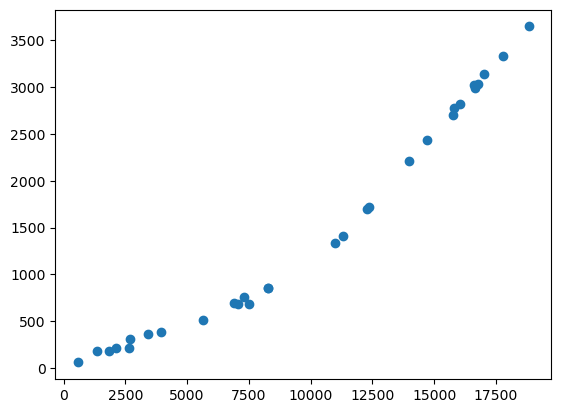

In [170]:
num_inst = 30

X = np.random.randint(0, 20000, num_inst)
y = np.zeros_like(X)
for i in range(len(X)):
    if X[i] < 10000:
        y[i] = 0.1*X[i]
    else:
        y[i] = 0.3*(X[i] - 10000) + 0.1*10000

y = y + 20*np.random.randn(num_inst) - 20*np.random.randn(num_inst)

plt.scatter(X,y)

In [171]:
np.random.seed(10)
weights = np.random.rand(10)
gradients = np.zeros_like(weights)
weights


array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [172]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [179]:
X_ = np.ones((num_inst, 7))
X_[:,0] = X.reshape(-1)
X_[:,2] = X.reshape(-1)
X_[:,4] = X.reshape(-1)
w1 = weights[0:6]
w1 = np.append(w1,1)
w2 = np.identity(7)*np.array([weights[6], weights[6], weights[7], weights[7], weights[8], weights[8], weights[9]]).reshape(1,-1)

w_ = w1.T@w2
mse(X_ @ w_, y)

array([9.81701049e+07, 8.35843726e+07, 7.88892174e+06, 1.10464299e+08,
       1.46078649e+08, 1.36476401e+06, 2.26625378e+06, 1.53135898e+07,
       2.56128541e+06, 7.46366798e+07, 1.02042200e+08, 4.53332397e+07,
       9.86375546e+07, 5.52056110e+07, 1.32927423e+07, 1.13032577e+08,
       1.28696223e+08, 1.16771029e+08, 3.10839476e+06, 1.63977136e+06,
       2.11434564e+07, 1.55369606e+06, 1.64027963e+07, 1.40170671e+06,
       1.11126164e+08, 2.11690451e+07, 5.58830084e+07, 1.41211167e+07,
       1.52603681e+06, 4.23533978e+07])